In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [3]:
(train_images,train_labels),(test_iamges,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 106s 1us/step


In [4]:
train_images,test_iamges=train_images/255.0,test_iamges/255.0

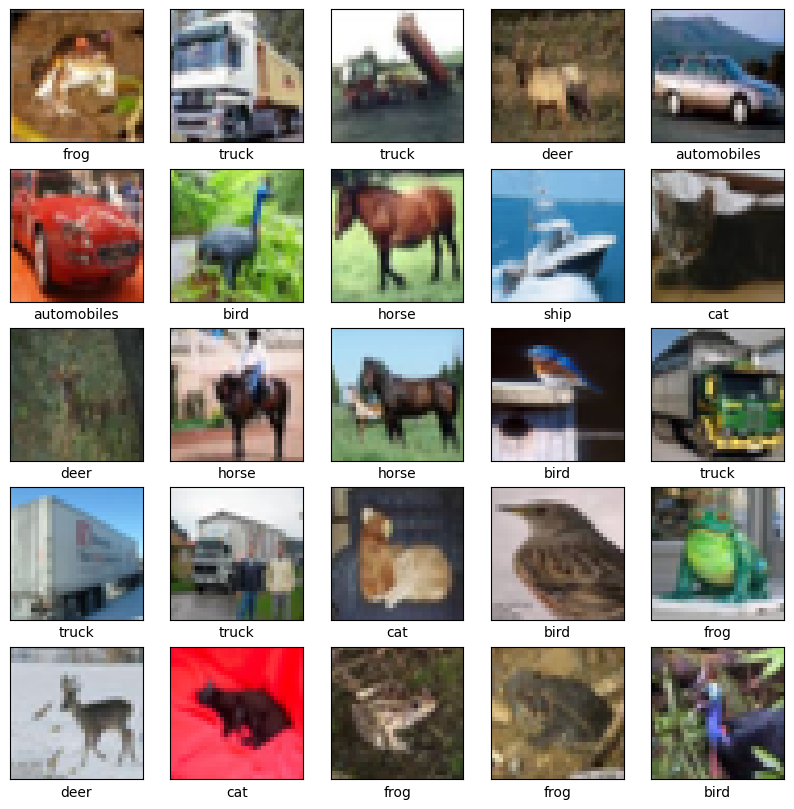

In [5]:
class_name=['Airplane','automobiles','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_name[train_labels[i][0]])
plt.show()   

In [6]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [18]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(train_images,train_labels,epochs=35,validation_data=(test_iamges,test_labels))

Epoch 1/35
1563/1563 [==============================] - 65s 26ms/step - loss: 0.1934 - accuracy: 0.9309 - val_loss: 2.0359 - val_accuracy: 0.6822
Epoch 2/35
1563/1563 [==============================] - 42s 27ms/step - loss: 0.1787 - accuracy: 0.9351 - val_loss: 2.1159 - val_accuracy: 0.6801
Epoch 3/35
1563/1563 [==============================] - 43s 28ms/step - loss: 0.1844 - accuracy: 0.9329 - val_loss: 2.2555 - val_accuracy: 0.6805
Epoch 4/35
1563/1563 [==============================] - 42s 27ms/step - loss: 0.1845 - accuracy: 0.9350 - val_loss: 2.1630 - val_accuracy: 0.6699
Epoch 5/35
1563/1563 [==============================] - 43s 27ms/step - loss: 0.1643 - accuracy: 0.9411 - val_loss: 2.1920 - val_accuracy: 0.6835
Epoch 6/35
1563/1563 [==============================] - 46s 29ms/step - loss: 0.1709 - accuracy: 0.9384 - val_loss: 2.3455 - val_accuracy: 0.6757
Epoch 7/35
1563/1563 [==============================] - 49s 32ms/step - loss: 0.1685 - accuracy: 0.9395 - val_loss: 2.2981 -

313/313 - 2s - loss: 3.0883 - accuracy: 0.6710 - 2s/epoch - 8ms/step


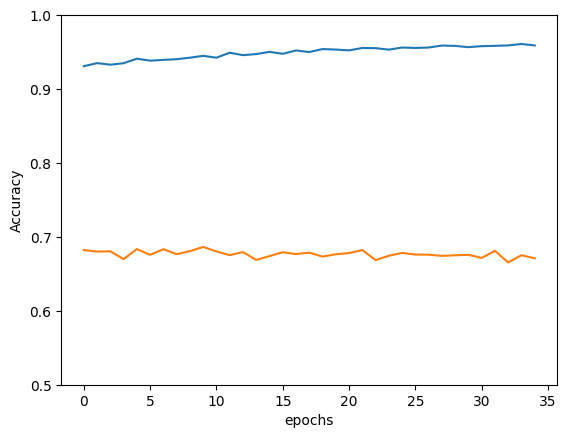

In [19]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])

test_loss,test_acc=model.evaluate(test_iamges,test_labels,verbose=2)

In [20]:

print(test_acc)

0.6710000038146973
